In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import operator
import math
import warnings
import openpyxl
import random
warnings.filterwarnings('ignore')
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score
import tensorflow as tf
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import CondensedNearestNeighbour
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
import pandas as pd

# 한글 글꼴체 변경
plt.rcParams['font.family'] ='Malgun Gothic'
# df.head() 이런거 했을 때, 컬럼이 생략되지 않고, 모든 컬럼 뜨게
pd.set_option('display.max_columns', None)
# 지수 표기법 대신에 소수점으로 표시하는코드
pd.options.display.float_format = '{:.2f}'.format
# 값 길이 제한 X
pd.set_option('display.max_colwidth', None) # 값 길이 제한 없음

01_15_LGHV_Modeling_afterFE.ipynb 에서의 모델링을 통해 나온 Feature Importance 이다.

📊 Feature Importance 비교 (2차)

| 순위 | 로지스틱 회귀 (랜덤 언더샘플링) | 랜덤 포레스트 (랜덤 언더샘플링) | XGBoost (랜덤 언더샘플링) | LightGBM (랜덤 언더샘플링) | CatBoost (랜덤 언더샘플링) | 로지스틱 회귀 (가중치) | LightGBM (가중치) |
|------|----------------------------------|----------------------------------|--------------------------|--------------------------|--------------------------|--------------------------|--------------------------|
| 1    | VOC_STOP_CANCEL_MONTH1_YN  | TOTAL_USED_DAYS                     | VOC_STOP_CANCEL_MONTH1_YN | MONTHS_REMAINING                   | MONTHS_REMAINING                 | VOC_STOP_CANCEL_MONTH1_YN | MONTHS_REMAINING               |
| 2    | CH_LAST_DAYS_BF_GRP                | MONTHS_REMAINING                 | CH_LAST_DAYS_BF_GRP               | TOTAL_USED_DAYS                       | VOC_STOP_CANCEL_MONTH1_YN | CH_LAST_DAYS_BF_GRP               | TOTAL_USED_DAYS                   |
| 3    | PAID_CHNL_CNT_GRP                  | CH_HH_AVG_MONTH1                 | CH_LAST_DAYS_FE                      | CH_LAST_DAYS_BF_GRP                 | CH_LAST_DAYS_BF_GRP                | PAID_CHNL_CNT_GRP                 | CH_LAST_DAYS_BF_GRP             |
| 4    | VOC_TOTAL_MONTH1_YN            | VOC_STOP_CANCEL_MONTH1_YN | VOC_TOTAL_MONTH1_YN            | CH_HH_AVG_MONTH1                  | TOTAL_USED_DAYS                       | TV_I_CNT                                  | AGE_GRP10                               |
| 5    | TV_I_CNT                                   | AGE_GRP10                                 | BUNDLE_YN                               | AGE_GRP10                                  | VOC_TOTAL_MONTH1_YN             | VOC_TOTAL_MONTH1_YN           | CH_HH_AVG_MONTH1                |
| 6    | BUNDLE_YN                               | VOC_TOTAL_MONTH1_YN            | MONTHS_REMAINING                 | INHOME_RATE                              | AGMT_END_SEG                           | BUNDLE_YN                              | TV_I_CNT                                  |
| 7    | CH_LAST_DAYS_FE                       | INHOME_RATE                            | MEDIA_NM_GRP                         | TV_I_CNT                                     | BUNDLE_YN                                 | CH_LAST_DAYS_FE                     | INHOME_RATE                           |
| 8    | AGMT_KIND_NM                         | CH_LAST_DAYS_BF_GRP               | TOTAL_USED_DAYS                     | SCRB_PATH_NM_GRP                    | INHOME_RATE                              | AGMT_KIND_NM                       | BUNDLE_YN                               |
| 9    | MEDIA_NM_GRP                         | SCRB_PATH_NM_GRP                   | AGMT_END_SEG                         | BUNDLE_YN                                 | AGE_GRP10                                   | MONTHS_REMAINING               | SCRB_PATH_NM_GRP                   |
| 10   | TOTAL_USED_DAYS                     | TV_I_CNT                                    | STB_RES_1M_YN                         | VOC_TOTAL_MONTH1_YN              | CH_HH_AVG_MONTH1                   | MEDIA_NM_GRP                        | VOC_TOTAL_MONTH1_YN            |
| 11   | MONTHS_REMAINING                  | PROD_NM_GRP                           | INHOME_RATE                           | AGMT_END_SEG                           | MEDIA_NM_GRP                            | INHOME_RATE                          | SVC_USE_DAYS_GRP                    |
| 12   | INHOME_RATE                            | AGMT_KIND_NM                         | PAID_CHNL_CNT_GRP                 | PROD_NM_GRP                            | TV_I_CNT                                      | AGE_GRP10                               | AGMT_END_SEG                         |
| 13   | AGE_GRP10                                 | AGMT_END_SEG                         | AGMT_KIND_NM                         | SVC_USE_DAYS_GRP                     | SCRB_PATH_NM_GRP                     | TOTAL_USED_DAYS                    | PROD_NM_GRP                          |
| 14   | AGMT_END_SEG_FE                     | SVC_USE_DAYS_GRP                    | AGE_GRP10                                 | MEDIA_NM_GRP                          | STB_RES_1M_YN                             | AGMT_END_SEG_FE                   | VOC_STOP_CANCEL_MONTH1_YN |
| 15   | AGMT_END_SEG                          | BUNDLE_YN                               | PROD_NM_GRP                           | AGMT_KIND_NM                         | AGMT_END_SEG_FE                        | AGMT_END_SEG                        | MEDIA_NM_GRP                         |
| 16   | SCRB_PATH_NM_GRP                   | CH_LAST_DAYS_FE                      | TV_I_CNT                                    | VOC_STOP_CANCEL_MONTH1_YN | PROD_NM_GRP                              | SCRB_PATH_NM_GRP                 | AGMT_KIND_NM                        |
| 17   | STB_RES_1M_YN                           | STB_RES_1M_YN                          | CH_HH_AVG_MONTH1                 | STB_RES_1M_YN                          | AGMT_KIND_NM                             | STB_RES_1M_YN                        | PAID_CHNL_CNT_GRP                 |
| 18   | KIDS_USE_YN                              | AGMT_END_SEG_FE                     | SCRB_PATH_NM_GRP                   | PAID_CHNL_CNT_GRP                 | SVC_USE_DAYS_GRP                        | KIDS_USE_YN                            | STB_RES_1M_YN                          |
| 19   | PROD_NM_GRP                           | MEDIA_NM_GRP                         | SVC_USE_DAYS_GRP                     | CONTENT_USE_YN                      | PAID_CHNL_CNT_GRP                     | PROD_NM_GRP                         | AGMT_END_SEG_FE                     |
| 20   | CH_HH_AVG_MONTH1                 | KIDS_USE_YN                             | CONTENT_USE_YN                       | AGMT_END_SEG_FE                     | CH_LAST_DAYS_FE                          | CH_HH_AVG_MONTH1                | CONTENT_USE_YN                      |
| 21   | CONTENT_USE_YN                       | PAID_CHNL_CNT_GRP                 | AGMT_END_SEG_FE                      | KIDS_USE_YN                             | CONTENT_USE_YN                          | CONTENT_USE_YN                     | KIDS_USE_YN                             |
| 22   | SVC_USE_DAYS_GRP                    | CONTENT_USE_YN                      | KIDS_USE_YN                              | CH_LAST_DAYS_FE                       | KIDS_USE_YN                                 | SVC_USE_DAYS_GRP                   | CH_LAST_DAYS_FE                      |

### ✅ Feature Selection

#### 📌 Feature Selection 과정 및 2차 Feature 선정

이번 Feature Selection 과정에서는 **7가지 모델(로지스틱 회귀, 랜덤 포레스트, XGBoost, LightGBM, CatBoost 등)의 Feature Importance 비교 결과를 기반**으로 **가장 의미 있는 피처들을 2차적으로 선정**하는 작업을 진행했음.

1️. 모델별 Feature Importance 비교
- 각 모델의 Feature Importance를 분석하여 **공통적으로 중요하게 나타나는 피처**를 우선적으로 고려함
- 특히, **다수의 모델에서 상위에 포함되는 피처**는 중요한 변수로 판단하여 유지

2️. 해석 가능성과 비즈니스적 의미 고려
- Feature Importance가 높더라도 **비즈니스적으로 의미가 없는 변수는 제외**하였습니다.
- 예를 들어, **총 사용일수(TOTAL_USED_DAYS)나 집돌이 지수(INHOME_RATE)** 같은 변수는  
  고객의 서비스 이용 패턴과 직접적인 연관이 있어 유지!!

3️. 중요도가 낮거나, 중복될 가능성이 높은 변수 제거
- **모든 모델에서 하위권(15위 이하)에 위치하는 변수들은 제거**
- **의미가 유사한 변수 중 하나만 선택**
  - 예: `CH_LAST_DAYS_BF_GRP` vs. `CH_LAST_DAYS_FE` → 더 중요한 `CH_LAST_DAYS_BF_GRP`만 유지.

4️. 2차 선정 피처 리스트 확정
- 다양한 모델에서 높은 중요도를 보이며, 해지 예측과 관련성이 높은 **16개의 피처를 2차적으로 선정**
- **불필요한 피처를 제거하여 모델의 복잡도를 줄이고, 성능을 최적화**하는 것을 목표로 하였음!

#### ✅ 2차 선정된 Features

| Feature |
|---------|
| `AGE_GRP10` |
| `AGMT_END_SEG` |
| `BUNDLE_YN` |
| `CH_HH_AVG_MONTH1` |
| `CH_LAST_DAYS_BF_GRP` |
| `CONTENT_USE_YN` |
| `INHOME_RATE` |
| `MEDIA_NM_GRP` |
| `MONTHS_REMAINING` |
| `SCRB_PATH_NM_GRP` |
| `STB_RES_1M_YN` |
| `SVC_USE_DAYS_GRP` |
| `TOTAL_USED_DAYS` |
| `TV_I_CNT` |
| `VOC_STOP_CANCEL_MONTH1_YN` |
| `VOC_TOTAL_MONTH1_YN` |

해당 Feature들을 가지고 **모델링을 한 번 더 진행!!**


---

In [3]:
df_real = pd.read_csv("data/full_data/TPS_cancel_data_FeatureEngineering_end.csv")

In [4]:
df_real.columns

Index(['sha2_hash', 'p_mt', 'SVC_USE_DAYS_GRP', 'MEDIA_NM_GRP', 'PROD_NM_GRP',
       'PROD_OLD_YN', 'PROD_ONE_PLUS_YN', 'AGMT_KIND_NM', 'STB_RES_1M_YN',
       'SVOD_SCRB_CNT_GRP', 'PAID_CHNL_CNT_GRP', 'SCRB_PATH_NM_GRP',
       'INHOME_RATE', 'AGMT_END_SEG', 'AGMT_END_YMD', 'TOTAL_USED_DAYS',
       'BUNDLE_YN', 'DIGITAL_GIGA_YN', 'DIGITAL_ALOG_YN', 'TV_I_CNT',
       'CH_LAST_DAYS_BF_GRP', 'VOC_TOTAL_MONTH1_YN',
       'VOC_STOP_CANCEL_MONTH1_YN', 'AGE_GRP10', 'EMAIL_RECV_CLS_NM',
       'SMS_SEND_CLS_NM', 'CH_HH_AVG_MONTH1', 'CH_FAV_RNK1',
       'KIDS_USE_PV_MONTH1', 'NFX_USE_YN', 'YTB_USE_YN', 'churn',
       'CH_25_RATIO_1MONTH', 'CONTENT_USE_YN', 'CH_LAST_DAYS_FE',
       'AGMT_END_SEG_FE', 'KIDS_USE_YN', 'MONTHS_REMAINING'],
      dtype='object')

In [5]:
# 해당 컬럼들 들고오기

df = df_real.filter(items=['sha2_hash', 'AGE_GRP10', 'AGMT_END_SEG', 'BUNDLE_YN', 'CH_HH_AVG_MONTH1',
                           'CH_LAST_DAYS_BF_GRP', 'CONTENT_USE_YN', 'INHOME_RATE', 'MEDIA_NM_GRP', 
                           'MONTHS_REMAINING', 'SCRB_PATH_NM_GRP', 'STB_RES_1M_YN', 'SVC_USE_DAYS_GRP', 
                           'TOTAL_USED_DAYS', 'TV_I_CNT', 'VOC_STOP_CANCEL_MONTH1_YN', 'VOC_TOTAL_MONTH1_YN', 
                           'p_mt', 'churn'])

In [6]:
display(df)

,sha2_hash,AGE_GRP10,AGMT_END_SEG,BUNDLE_YN,CH_HH_AVG_MONTH1,CH_LAST_DAYS_BF_GRP,CONTENT_USE_YN,INHOME_RATE,MEDIA_NM_GRP,MONTHS_REMAINING,SCRB_PATH_NM_GRP,STB_RES_1M_YN,SVC_USE_DAYS_GRP,TOTAL_USED_DAYS,TV_I_CNT,VOC_STOP_CANCEL_MONTH1_YN,VOC_TOTAL_MONTH1_YN,p_mt,churn
0,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,60대,약정만료전 12개월이상,Y,0.00,3개월내없음,N,10.00,HD,13,I/B,N,12개월~24개월미만,733,3.00,N,N,2,N
1,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,60대,약정만료전 9~12개월,Y,6.72,일주일내,N,0.00,HD,12,I/B,Y,24개월~ 36개월미만,764,3.00,N,Y,3,N
2,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,60대,약정만료전 9~12개월,Y,9.86,3주일전,N,10.00,HD,11,I/B,N,24개월~ 36개월미만,794,3.00,N,N,4,N
3,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,60대,약정만료전 9~12개월,Y,5.95,4주일전,N,10.00,HD,10,I/B,N,24개월~ 36개월미만,825,3.00,N,N,5,N
4,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,60대,약정만료전 6~9개월,Y,4.03,일주일내,N,0.00,HD,9,I/B,N,24개월~ 36개월미만,855,3.00,N,N,6,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21483374,fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7,50대,약정만료후 12개월이상,N,2.03,일주일내,N,10.00,HD,-40,현장경로,N,36개월 이상,2338,1.00,N,N,8,N
21483375,fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7,50대,약정만료후 12개월이상,N,2.91,일주일내,N,10.00,HD,-41,현장경로,N,36개월 이상,2368,1.00,N,N,9,N
21483376,fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7,50대,약정만료후 12개월이상,N,1.97,2주일전,N,10.00,HD,-42,현장경로,N,36개월 이상,2399,1.00,N,Y,10,N
21483377,fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7,50대,약정만료후 12개월이상,N,0.00,3개월내없음,N,0.00,HD,-43,현장경로,N,36개월 이상,2429,1.00,N,N,11,N


In [7]:
df.columns

Index(['sha2_hash', 'AGE_GRP10', 'AGMT_END_SEG', 'BUNDLE_YN',
       'CH_HH_AVG_MONTH1', 'CH_LAST_DAYS_BF_GRP', 'CONTENT_USE_YN',
       'INHOME_RATE', 'MEDIA_NM_GRP', 'MONTHS_REMAINING', 'SCRB_PATH_NM_GRP',
       'STB_RES_1M_YN', 'SVC_USE_DAYS_GRP', 'TOTAL_USED_DAYS', 'TV_I_CNT',
       'VOC_STOP_CANCEL_MONTH1_YN', 'VOC_TOTAL_MONTH1_YN', 'p_mt', 'churn'],
      dtype='object')

---

### 랜덤 언더 샘플링 데이터로 진행
1. 로지스틱
2. 랜덤 포레스트
3. XGB
4. LGBM
5. Cat

#### 1. LR 랜덤 언더 샘플링 데이터

In [8]:
# 2월 ~ 9월 train
# 11월 test
train = df[df['p_mt'].isin([2,3,4,5,6,7,8,9])]
test = df[df['p_mt'] == 11]

In [9]:
display(train, test)

,sha2_hash,AGE_GRP10,AGMT_END_SEG,BUNDLE_YN,CH_HH_AVG_MONTH1,CH_LAST_DAYS_BF_GRP,CONTENT_USE_YN,INHOME_RATE,MEDIA_NM_GRP,MONTHS_REMAINING,SCRB_PATH_NM_GRP,STB_RES_1M_YN,SVC_USE_DAYS_GRP,TOTAL_USED_DAYS,TV_I_CNT,VOC_STOP_CANCEL_MONTH1_YN,VOC_TOTAL_MONTH1_YN,p_mt,churn
0,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,60대,약정만료전 12개월이상,Y,0.00,3개월내없음,N,10.00,HD,13,I/B,N,12개월~24개월미만,733,3.00,N,N,2,N
1,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,60대,약정만료전 9~12개월,Y,6.72,일주일내,N,0.00,HD,12,I/B,Y,24개월~ 36개월미만,764,3.00,N,Y,3,N
2,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,60대,약정만료전 9~12개월,Y,9.86,3주일전,N,10.00,HD,11,I/B,N,24개월~ 36개월미만,794,3.00,N,N,4,N
3,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,60대,약정만료전 9~12개월,Y,5.95,4주일전,N,10.00,HD,10,I/B,N,24개월~ 36개월미만,825,3.00,N,N,5,N
4,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,60대,약정만료전 6~9개월,Y,4.03,일주일내,N,0.00,HD,9,I/B,N,24개월~ 36개월미만,855,3.00,N,N,6,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21483371,fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7,50대,약정만료후 12개월이상,N,3.67,일주일내,N,10.00,HD,-37,현장경로,N,36개월 이상,2246,1.00,N,N,5,N
21483372,fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7,50대,약정만료후 12개월이상,N,3.14,일주일내,N,10.00,HD,-38,현장경로,N,36개월 이상,2276,1.00,N,N,6,N
21483373,fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7,50대,약정만료후 12개월이상,N,4.10,일주일내,N,10.00,HD,-39,현장경로,N,36개월 이상,2307,1.00,N,N,7,N
21483374,fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7,50대,약정만료후 12개월이상,N,2.03,일주일내,N,10.00,HD,-40,현장경로,N,36개월 이상,2338,1.00,N,N,8,N


,sha2_hash,AGE_GRP10,AGMT_END_SEG,BUNDLE_YN,CH_HH_AVG_MONTH1,CH_LAST_DAYS_BF_GRP,CONTENT_USE_YN,INHOME_RATE,MEDIA_NM_GRP,MONTHS_REMAINING,SCRB_PATH_NM_GRP,STB_RES_1M_YN,SVC_USE_DAYS_GRP,TOTAL_USED_DAYS,TV_I_CNT,VOC_STOP_CANCEL_MONTH1_YN,VOC_TOTAL_MONTH1_YN,p_mt,churn
9,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,60대,약정만료전 12개월이상,Y,6.23,일주일내,N,20.00,HD,33,I/B,N,24개월~ 36개월미만,1008,3.00,N,N,11,N
20,000015c9d6e36eac1e706b7495b536c36a7478897895f05e5b3b7f47a05fba34,50대,약정만료전 6~9개월,Y,15.37,일주일내,N,70.00,HD,7,I/B,N,24개월~ 36개월미만,4402,2.00,N,N,11,N
31,0000161608bc85042f2a7b2d51524e01e44da09a2c92ed7136f09c3b90414858,60대,약정만료전 12개월이상,Y,1.47,일주일내,N,10.00,HD,20,일반상담,N,36개월 이상,2641,6.00,N,N,11,N
42,00001c363e8c833646a913c7566acd329523316f6a03afc0fe77dac7ca828d17,60대,약정만료후 9~12개월,N,2.16,일주일내,N,10.00,HD,-10,일반상담,N,36개월 이상,1989,3.00,N,N,11,N
53,00001f885d4d6c5ff6d01d5ebf1d6093d7f53c130de5fa3652dc0424d165b21c,50대,약정만료후 12개월이상,Y,1.64,일주일내,N,0.00,HD,-51,현장경로,N,36개월 이상,3979,4.00,N,Y,11,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21483333,ffffdac172fec24c59aea00b7c6e53b8f9631e323cb99ada41a5fc7c38eaa74c,50대,약정만료후 12개월이상,N,0.00,3개월내없음,N,0.00,HD,-48,현장경로,N,36개월 이상,3599,2.00,N,N,11,N
21483344,ffffe2ae4b1bafe83133c187e7628932d4915bc7ee92457ac4b1b61e5362c3ba,40대,약정만료후 12개월이상,Y,1.81,일주일내,N,10.00,HD,-39,O/B,N,36개월 이상,2281,3.00,N,N,11,N
21483355,ffffe9bc336450ed573a845cea2376c7dc913ba9d775e3223931ed33ba2f08f0,30대,약정만료후 12개월이상,N,1.69,일주일내,N,0.00,HD,-109,일반상담,N,12개월~24개월미만,3958,2.00,N,N,11,N
21483366,ffffeb35773f914285afa493a7b7cf236063af847c72f39cab28d078edfc74df,50대,약정만료전 12개월이상,Y,3.39,일주일내,N,20.00,UHD,19,I/B,N,36개월 이상,1552,2.00,N,N,11,N


In [10]:
display(train['churn'].value_counts(normalize=True) * 100)
display(train['churn'].value_counts())

churn
N   99.32
Y    0.68
Name: proportion, dtype: float64

churn
N    15541330
Y      105706
Name: count, dtype: int64

랜덤 언더 샘플링

In [11]:
train

,sha2_hash,AGE_GRP10,AGMT_END_SEG,BUNDLE_YN,CH_HH_AVG_MONTH1,CH_LAST_DAYS_BF_GRP,CONTENT_USE_YN,INHOME_RATE,MEDIA_NM_GRP,MONTHS_REMAINING,SCRB_PATH_NM_GRP,STB_RES_1M_YN,SVC_USE_DAYS_GRP,TOTAL_USED_DAYS,TV_I_CNT,VOC_STOP_CANCEL_MONTH1_YN,VOC_TOTAL_MONTH1_YN,p_mt,churn
0,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,60대,약정만료전 12개월이상,Y,0.00,3개월내없음,N,10.00,HD,13,I/B,N,12개월~24개월미만,733,3.00,N,N,2,N
1,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,60대,약정만료전 9~12개월,Y,6.72,일주일내,N,0.00,HD,12,I/B,Y,24개월~ 36개월미만,764,3.00,N,Y,3,N
2,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,60대,약정만료전 9~12개월,Y,9.86,3주일전,N,10.00,HD,11,I/B,N,24개월~ 36개월미만,794,3.00,N,N,4,N
3,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,60대,약정만료전 9~12개월,Y,5.95,4주일전,N,10.00,HD,10,I/B,N,24개월~ 36개월미만,825,3.00,N,N,5,N
4,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,60대,약정만료전 6~9개월,Y,4.03,일주일내,N,0.00,HD,9,I/B,N,24개월~ 36개월미만,855,3.00,N,N,6,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21483371,fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7,50대,약정만료후 12개월이상,N,3.67,일주일내,N,10.00,HD,-37,현장경로,N,36개월 이상,2246,1.00,N,N,5,N
21483372,fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7,50대,약정만료후 12개월이상,N,3.14,일주일내,N,10.00,HD,-38,현장경로,N,36개월 이상,2276,1.00,N,N,6,N
21483373,fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7,50대,약정만료후 12개월이상,N,4.10,일주일내,N,10.00,HD,-39,현장경로,N,36개월 이상,2307,1.00,N,N,7,N
21483374,fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7,50대,약정만료후 12개월이상,N,2.03,일주일내,N,10.00,HD,-40,현장경로,N,36개월 이상,2338,1.00,N,N,8,N


In [12]:
train = train.drop(columns = ['sha2_hash','p_mt'])

In [13]:
# 랜덤 시드 42로 설정하고 랜덤 언더 샘플링 진행
from imblearn.under_sampling import RandomUnderSampler

X = train.drop(columns = ['churn'])
y = train['churn']

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [14]:
# 원본 데이터 churn 분포!
print("랜덤 언더 샘플링 전:")
print(y.value_counts())

# 랜덤 언더 샘플링 후, churn 분포!
print("\n랜덤 언더 샘플링 후:")
print(pd.Series(y_resampled).value_counts())

랜덤 언더 샘플링 전:
churn
N    15541330
Y      105706
Name: count, dtype: int64

랜덤 언더 샘플링 후:
churn
N    105706
Y    105706
Name: count, dtype: int64


In [15]:
# y_resampled의 이름을 churn으로 명확하게 설정
y_resampled = pd.Series(y_resampled, name='churn')

# 그리고 X_resampled와 y_resampled 병합
resampled_data = pd.concat([X_resampled, y_resampled], axis=1)

In [16]:
display(resampled_data)

,AGE_GRP10,AGMT_END_SEG,BUNDLE_YN,CH_HH_AVG_MONTH1,CH_LAST_DAYS_BF_GRP,CONTENT_USE_YN,INHOME_RATE,MEDIA_NM_GRP,MONTHS_REMAINING,SCRB_PATH_NM_GRP,STB_RES_1M_YN,SVC_USE_DAYS_GRP,TOTAL_USED_DAYS,TV_I_CNT,VOC_STOP_CANCEL_MONTH1_YN,VOC_TOTAL_MONTH1_YN,churn
9584974,60대,약정만료전 12개월이상,Y,5.89,일주일내,N,30.00,HD,17,O/B,N,36개월 이상,2812,3.00,N,N,N
21276676,30대,약정만료후 12개월이상,Y,10.47,일주일내,Y,50.00,UHD,-40,일반상담,N,6개월~12개월미만,2326,2.00,N,N,N
3206023,60대,약정만료전 12개월이상,N,10.28,일주일내,N,60.00,HD,28,I/B,N,6개월~12개월미만,3076,2.00,N,N,N
12989342,50대,약정만료전 12개월이상,Y,2.09,일주일내,N,10.00,HD,20,일반상담,N,36개월 이상,3807,2.00,N,N,N
17489377,90대이상,약정만료전 12개월이상,Y,0.33,3주일전,N,0.00,HD,19,O/B,N,12개월~24개월미만,3927,3.00,N,Y,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21482271,60대,약정만료전 12개월이상,Y,1.90,일주일내,N,0.00,HD,30,일반상담,Y,36개월 이상,3712,2.00,N,N,Y
21482420,30대,약정만료전 12개월이상,Y,0.00,3개월내없음,N,0.00,HD,20,O/B,Y,12개월~24개월미만,501,2.00,N,N,Y
21482906,50대,약정만료전 12개월이상,Y,3.49,일주일내,Y,0.00,UHD,36,현장경로,Y,6개월미만,11,2.00,N,Y,Y
21483095,50대,약정만료전 12개월이상,N,0.62,일주일전,N,0.00,HD,29,현장경로,N,6개월~12개월미만,231,1.00,N,N,Y


In [17]:
train = resampled_data

로지스틱 회귀 진행

In [18]:
display(train)
display(test)

,AGE_GRP10,AGMT_END_SEG,BUNDLE_YN,CH_HH_AVG_MONTH1,CH_LAST_DAYS_BF_GRP,CONTENT_USE_YN,INHOME_RATE,MEDIA_NM_GRP,MONTHS_REMAINING,SCRB_PATH_NM_GRP,STB_RES_1M_YN,SVC_USE_DAYS_GRP,TOTAL_USED_DAYS,TV_I_CNT,VOC_STOP_CANCEL_MONTH1_YN,VOC_TOTAL_MONTH1_YN,churn
9584974,60대,약정만료전 12개월이상,Y,5.89,일주일내,N,30.00,HD,17,O/B,N,36개월 이상,2812,3.00,N,N,N
21276676,30대,약정만료후 12개월이상,Y,10.47,일주일내,Y,50.00,UHD,-40,일반상담,N,6개월~12개월미만,2326,2.00,N,N,N
3206023,60대,약정만료전 12개월이상,N,10.28,일주일내,N,60.00,HD,28,I/B,N,6개월~12개월미만,3076,2.00,N,N,N
12989342,50대,약정만료전 12개월이상,Y,2.09,일주일내,N,10.00,HD,20,일반상담,N,36개월 이상,3807,2.00,N,N,N
17489377,90대이상,약정만료전 12개월이상,Y,0.33,3주일전,N,0.00,HD,19,O/B,N,12개월~24개월미만,3927,3.00,N,Y,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21482271,60대,약정만료전 12개월이상,Y,1.90,일주일내,N,0.00,HD,30,일반상담,Y,36개월 이상,3712,2.00,N,N,Y
21482420,30대,약정만료전 12개월이상,Y,0.00,3개월내없음,N,0.00,HD,20,O/B,Y,12개월~24개월미만,501,2.00,N,N,Y
21482906,50대,약정만료전 12개월이상,Y,3.49,일주일내,Y,0.00,UHD,36,현장경로,Y,6개월미만,11,2.00,N,Y,Y
21483095,50대,약정만료전 12개월이상,N,0.62,일주일전,N,0.00,HD,29,현장경로,N,6개월~12개월미만,231,1.00,N,N,Y


,sha2_hash,AGE_GRP10,AGMT_END_SEG,BUNDLE_YN,CH_HH_AVG_MONTH1,CH_LAST_DAYS_BF_GRP,CONTENT_USE_YN,INHOME_RATE,MEDIA_NM_GRP,MONTHS_REMAINING,SCRB_PATH_NM_GRP,STB_RES_1M_YN,SVC_USE_DAYS_GRP,TOTAL_USED_DAYS,TV_I_CNT,VOC_STOP_CANCEL_MONTH1_YN,VOC_TOTAL_MONTH1_YN,p_mt,churn
9,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,60대,약정만료전 12개월이상,Y,6.23,일주일내,N,20.00,HD,33,I/B,N,24개월~ 36개월미만,1008,3.00,N,N,11,N
20,000015c9d6e36eac1e706b7495b536c36a7478897895f05e5b3b7f47a05fba34,50대,약정만료전 6~9개월,Y,15.37,일주일내,N,70.00,HD,7,I/B,N,24개월~ 36개월미만,4402,2.00,N,N,11,N
31,0000161608bc85042f2a7b2d51524e01e44da09a2c92ed7136f09c3b90414858,60대,약정만료전 12개월이상,Y,1.47,일주일내,N,10.00,HD,20,일반상담,N,36개월 이상,2641,6.00,N,N,11,N
42,00001c363e8c833646a913c7566acd329523316f6a03afc0fe77dac7ca828d17,60대,약정만료후 9~12개월,N,2.16,일주일내,N,10.00,HD,-10,일반상담,N,36개월 이상,1989,3.00,N,N,11,N
53,00001f885d4d6c5ff6d01d5ebf1d6093d7f53c130de5fa3652dc0424d165b21c,50대,약정만료후 12개월이상,Y,1.64,일주일내,N,0.00,HD,-51,현장경로,N,36개월 이상,3979,4.00,N,Y,11,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21483333,ffffdac172fec24c59aea00b7c6e53b8f9631e323cb99ada41a5fc7c38eaa74c,50대,약정만료후 12개월이상,N,0.00,3개월내없음,N,0.00,HD,-48,현장경로,N,36개월 이상,3599,2.00,N,N,11,N
21483344,ffffe2ae4b1bafe83133c187e7628932d4915bc7ee92457ac4b1b61e5362c3ba,40대,약정만료후 12개월이상,Y,1.81,일주일내,N,10.00,HD,-39,O/B,N,36개월 이상,2281,3.00,N,N,11,N
21483355,ffffe9bc336450ed573a845cea2376c7dc913ba9d775e3223931ed33ba2f08f0,30대,약정만료후 12개월이상,N,1.69,일주일내,N,0.00,HD,-109,일반상담,N,12개월~24개월미만,3958,2.00,N,N,11,N
21483366,ffffeb35773f914285afa493a7b7cf236063af847c72f39cab28d078edfc74df,50대,약정만료전 12개월이상,Y,3.39,일주일내,N,20.00,UHD,19,I/B,N,36개월 이상,1552,2.00,N,N,11,N


In [19]:
# INHOME_RATE 컬럼은 object로

train['INHOME_RATE'] = train['INHOME_RATE'].astype(str)
test['INHOME_RATE'] = test['INHOME_RATE'].astype(str)
print(train['INHOME_RATE'].dtypes)
print(test['INHOME_RATE'].dtypes)

object
object


In [20]:
test = test.drop(columns=['sha2_hash','p_mt'])

In [21]:
from sklearn.preprocessing import LabelEncoder

train_and_test = pd.concat([train, test])

categorical_cols = train_and_test.select_dtypes(include=['object']).columns

label_encoders = {}

for col in categorical_cols:
  le = LabelEncoder()
  train_and_test[col] = le.fit_transform(train_and_test[col])
  label_encoders[col] = le

# 인코딩 후, 다시 train과 test로 분리

train = train_and_test.iloc[:len(train)].reset_index(drop=True)
test = train_and_test.iloc[len(train):].reset_index(drop=True)

print("레이블 인코딩 끝! 😁")

레이블 인코딩 끝! 😁


In [22]:
for col, le in label_encoders.items():
    print(f"🔹 {col} 레이블 인코딩 매핑")
    label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(label_mapping)
    print("-" * 30)

🔹 AGE_GRP10 레이블 인코딩 매핑
{'10대': 0, '20대': 1, '30대': 2, '40대': 3, '50대': 4, '60대': 5, '70대': 6, '80대': 7, '90대이상': 8, '연령없음': 9}
------------------------------
🔹 AGMT_END_SEG 레이블 인코딩 매핑
{'약정만료 1개월': 0, '약정만료전 12개월이상': 1, '약정만료전 1~2개월': 2, '약정만료전 1개월': 3, '약정만료전 2~3개월': 4, '약정만료전 3~6개월': 5, '약정만료전 6~9개월': 6, '약정만료전 9~12개월': 7, '약정만료후 12개월이상': 8, '약정만료후 1개월~2개월': 9, '약정만료후 2개월~3개월': 10, '약정만료후 3~6개월': 11, '약정만료후 6~9개월': 12, '약정만료후 9~12개월': 13}
------------------------------
🔹 BUNDLE_YN 레이블 인코딩 매핑
{'N': 0, 'Y': 1}
------------------------------
🔹 CH_LAST_DAYS_BF_GRP 레이블 인코딩 매핑
{'2주일전': 0, '3개월내없음': 1, '3주일전': 2, '4주일전': 3, '일주일내': 4, '일주일전': 5}
------------------------------
🔹 CONTENT_USE_YN 레이블 인코딩 매핑
{'N': 0, 'Y': 1}
------------------------------
🔹 INHOME_RATE 레이블 인코딩 매핑
{'0.0': 0, '10.0': 1, '100.0': 2, '20.0': 3, '30.0': 4, '40.0': 5, '50.0': 6, '60.0': 7, '70.0': 8, '80.0': 9, '90.0': 10}
------------------------------
🔹 MEDIA_NM_GRP 레이블 인코딩 매핑
{'HD': 0, 'UHD': 1, '기타': 2}
-----------

In [23]:
display(train)
display(test)

,AGE_GRP10,AGMT_END_SEG,BUNDLE_YN,CH_HH_AVG_MONTH1,CH_LAST_DAYS_BF_GRP,CONTENT_USE_YN,INHOME_RATE,MEDIA_NM_GRP,MONTHS_REMAINING,SCRB_PATH_NM_GRP,STB_RES_1M_YN,SVC_USE_DAYS_GRP,TOTAL_USED_DAYS,TV_I_CNT,VOC_STOP_CANCEL_MONTH1_YN,VOC_TOTAL_MONTH1_YN,churn
0,5,1,1,5.89,4,0,4,0,17,1,0,2,2812,3.00,0,0,0
1,2,8,1,10.47,4,1,6,1,-40,4,0,3,2326,2.00,0,0,0
2,5,1,0,10.28,4,0,7,0,28,0,0,3,3076,2.00,0,0,0
3,4,1,1,2.09,4,0,1,0,20,4,0,2,3807,2.00,0,0,0
4,8,1,1,0.33,2,0,0,0,19,1,0,0,3927,3.00,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211407,5,1,1,1.90,4,0,0,0,30,4,1,2,3712,2.00,0,0,1
211408,2,1,1,0.00,1,0,0,0,20,1,1,0,501,2.00,0,0,1
211409,4,1,1,3.49,4,1,0,1,36,9,1,4,11,2.00,0,1,1
211410,4,1,0,0.62,5,0,0,0,29,9,0,3,231,1.00,0,0,1


,AGE_GRP10,AGMT_END_SEG,BUNDLE_YN,CH_HH_AVG_MONTH1,CH_LAST_DAYS_BF_GRP,CONTENT_USE_YN,INHOME_RATE,MEDIA_NM_GRP,MONTHS_REMAINING,SCRB_PATH_NM_GRP,STB_RES_1M_YN,SVC_USE_DAYS_GRP,TOTAL_USED_DAYS,TV_I_CNT,VOC_STOP_CANCEL_MONTH1_YN,VOC_TOTAL_MONTH1_YN,churn
0,5,1,1,6.23,4,0,3,0,33,0,0,1,1008,3.00,0,0,0
1,4,6,1,15.37,4,0,8,0,7,0,0,1,4402,2.00,0,0,0
2,5,1,1,1.47,4,0,1,0,20,4,0,2,2641,6.00,0,0,0
3,5,13,0,2.16,4,0,1,0,-10,4,0,2,1989,3.00,0,0,0
4,4,8,1,1.64,4,0,0,0,-51,9,0,2,3979,4.00,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945587,4,8,0,0.00,1,0,0,0,-48,9,0,2,3599,2.00,0,0,0
1945588,3,8,1,1.81,4,0,1,0,-39,1,0,2,2281,3.00,0,0,0
1945589,2,8,0,1.69,4,0,0,0,-109,4,0,0,3958,2.00,0,0,0
1945590,4,1,1,3.39,4,0,3,1,19,0,0,2,1552,2.00,0,0,0


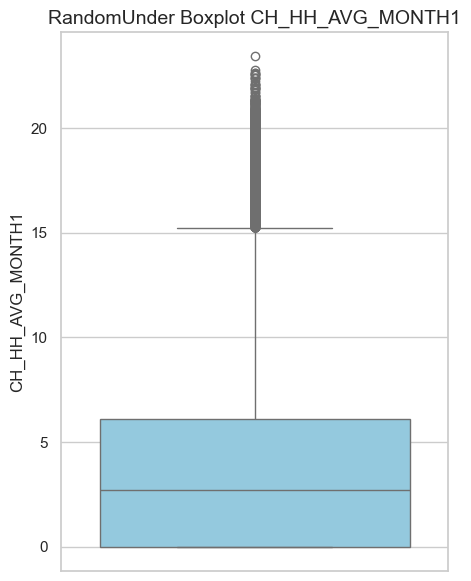

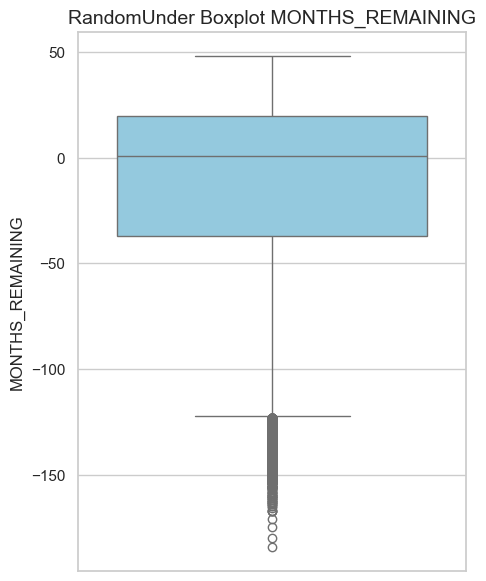

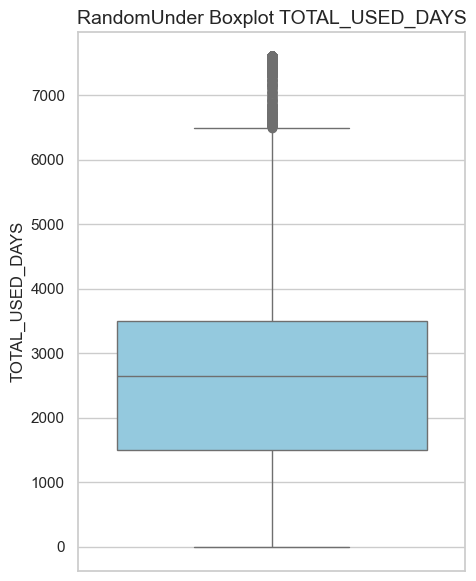

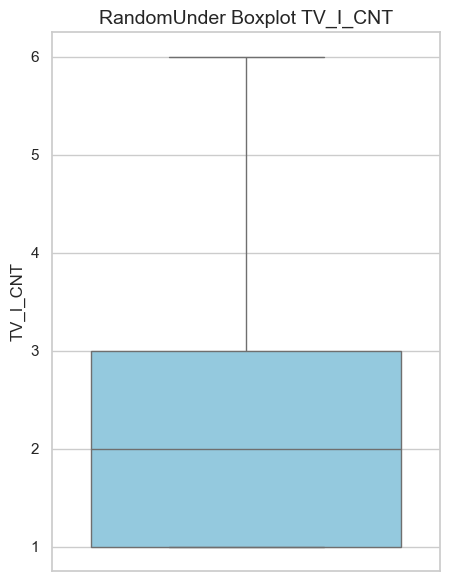

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# df에서 연속형(수치형) 변수 찾기
numeric_columns = train.select_dtypes(include=['int64', 'float64']).columns.tolist()

sns.set(style="whitegrid")

# 각 연속형 변수에 대해 boxplot
for col in numeric_columns:
    plt.figure(figsize=(5, 7))
    sns.boxplot(y=train[col], color="skyblue")

    plt.ylabel(col, fontsize=12)
    plt.title(f'RandomUnder Boxplot {col}', fontsize=14)

    plt.show()

In [25]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

# boxplot으로 확인한 robust 스케일링 컬럼들
robust_columns = ['TOTAL_USED_DAYS', 'CH_HH_AVG_MONTH1', 'MONTHS_REMAINING']  # RobustScaler를 적용할 컬럼
minmax_columns = [col for col in train.columns if col not in robust_columns + ['churn']]  # 나머지 컬럼

# 스케일러 생성
robust_scaler = RobustScaler()
minmax_scaler = MinMaxScaler()

# RobustScaler 적용
train[robust_columns] = robust_scaler.fit_transform(train[robust_columns])
test[robust_columns] = robust_scaler.transform(test[robust_columns])

# MinMaxScaler 적용
train[minmax_columns] = minmax_scaler.fit_transform(train[minmax_columns])
test[minmax_columns] = minmax_scaler.transform(test[minmax_columns])

# 결과 확인
print("robust, minmax 끝")

robust, minmax 끝


In [26]:
display(train, test)

,AGE_GRP10,AGMT_END_SEG,BUNDLE_YN,CH_HH_AVG_MONTH1,CH_LAST_DAYS_BF_GRP,CONTENT_USE_YN,INHOME_RATE,MEDIA_NM_GRP,MONTHS_REMAINING,SCRB_PATH_NM_GRP,STB_RES_1M_YN,SVC_USE_DAYS_GRP,TOTAL_USED_DAYS,TV_I_CNT,VOC_STOP_CANCEL_MONTH1_YN,VOC_TOTAL_MONTH1_YN,churn
0,0.50,0.08,1.00,0.52,0.80,0.00,0.40,0.00,0.28,0.11,0.00,0.50,0.09,0.40,0.00,0.00,0
1,0.12,0.62,1.00,1.27,0.80,1.00,0.60,0.50,-0.72,0.44,0.00,0.75,-0.16,0.20,0.00,0.00,0
2,0.50,0.08,0.00,1.24,0.80,0.00,0.70,0.00,0.47,0.00,0.00,0.75,0.22,0.20,0.00,0.00,0
3,0.38,0.08,1.00,-0.10,0.80,0.00,0.10,0.00,0.33,0.44,0.00,0.50,0.58,0.20,0.00,0.00,0
4,0.88,0.08,1.00,-0.39,0.40,0.00,0.00,0.00,0.32,0.11,0.00,0.00,0.64,0.40,0.00,1.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211407,0.50,0.08,1.00,-0.13,0.80,0.00,0.00,0.00,0.51,0.44,1.00,0.50,0.54,0.20,0.00,0.00,1
211408,0.12,0.08,1.00,-0.44,0.20,0.00,0.00,0.00,0.33,0.11,1.00,0.00,-1.07,0.20,0.00,0.00,1
211409,0.38,0.08,1.00,0.13,0.80,1.00,0.00,0.50,0.61,1.00,1.00,1.00,-1.32,0.20,0.00,1.00,1
211410,0.38,0.08,0.00,-0.34,1.00,0.00,0.00,0.00,0.49,1.00,0.00,0.75,-1.21,0.00,0.00,0.00,1


,AGE_GRP10,AGMT_END_SEG,BUNDLE_YN,CH_HH_AVG_MONTH1,CH_LAST_DAYS_BF_GRP,CONTENT_USE_YN,INHOME_RATE,MEDIA_NM_GRP,MONTHS_REMAINING,SCRB_PATH_NM_GRP,STB_RES_1M_YN,SVC_USE_DAYS_GRP,TOTAL_USED_DAYS,TV_I_CNT,VOC_STOP_CANCEL_MONTH1_YN,VOC_TOTAL_MONTH1_YN,churn
0,0.50,0.08,1.00,0.58,0.80,0.00,0.30,0.00,0.56,0.00,0.00,0.25,-0.82,0.40,0.00,0.00,0
1,0.38,0.46,1.00,2.08,0.80,0.00,0.80,0.00,0.11,0.00,0.00,0.25,0.88,0.20,0.00,0.00,0
2,0.50,0.08,1.00,-0.20,0.80,0.00,0.10,0.00,0.33,0.44,0.00,0.50,-0.00,1.00,0.00,0.00,0
3,0.50,1.00,0.00,-0.09,0.80,0.00,0.10,0.00,-0.19,0.44,0.00,0.50,-0.33,0.40,0.00,0.00,0
4,0.38,0.62,1.00,-0.18,0.80,0.00,0.00,0.00,-0.91,1.00,0.00,0.50,0.67,0.60,0.00,1.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945587,0.38,0.62,0.00,-0.44,0.20,0.00,0.00,0.00,-0.86,1.00,0.00,0.50,0.48,0.20,0.00,0.00,0
1945588,0.25,0.62,1.00,-0.15,0.80,0.00,0.10,0.00,-0.70,0.11,0.00,0.50,-0.18,0.40,0.00,0.00,0
1945589,0.12,0.62,0.00,-0.17,0.80,0.00,0.00,0.00,-1.93,0.44,0.00,0.00,0.66,0.20,0.00,0.00,0
1945590,0.38,0.08,1.00,0.11,0.80,0.00,0.30,0.50,0.32,0.00,0.00,0.50,-0.55,0.20,0.00,0.00,0


In [27]:
# 로지스틱 회귀 모델 진행

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train = train.drop(columns=['churn'])
y_train = train['churn']

# 로지스틱 회귀 모델 생성
#
model = LogisticRegression(solver='liblinear', random_state=42)

# 모델 학습
model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

Test Accuracy: 0.78

Classification Report (테스트 데이터):
              precision    recall  f1-score   support

           0       1.00      0.78      0.88   1932416
           1       0.02      0.69      0.04     13176

    accuracy                           0.78   1945592
   macro avg       0.51      0.74      0.46   1945592
weighted avg       0.99      0.78      0.87   1945592


Confusion Matrix (테스트 데이터):
[[1511867  420549]
 [   4096    9080]]


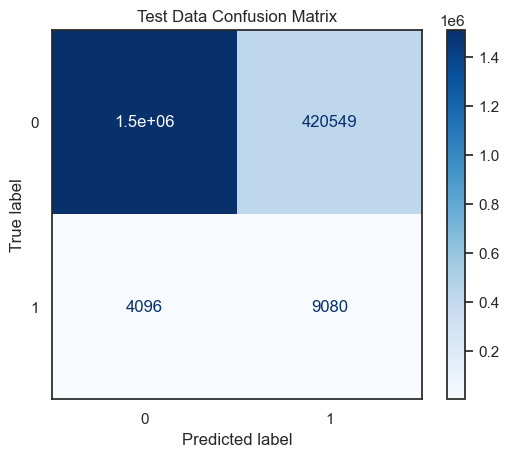

Test AUC-ROC: 0.81


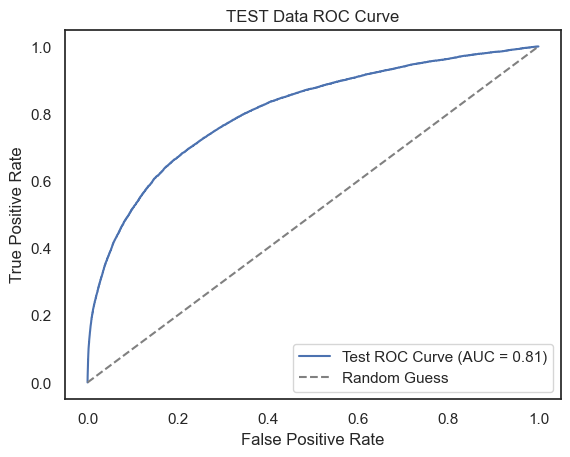

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay  # ConfusionMatrixDisplay 임포트
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

# 테스트 데이터 불러오기
X_test = test.drop(columns=['churn'])
y_test = test['churn']

# -----------------------------------------------------------
# 테스트 데이터 (Test) 평가
# -----------------------------------------------------------
# 테스트 데이터(test) 예측
test_predictions = model.predict(X_test)

# 정확도 확인
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Classification 리포트
print("\nClassification Report (테스트 데이터):")
print(classification_report(y_test, test_predictions))

# Confusion Matrix (혼동행렬)
print("\nConfusion Matrix (테스트 데이터):")
print(confusion_matrix(y_test, test_predictions))
disp_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, test_predictions), display_labels=model.classes_)

plt.figure()
disp_test.plot(cmap="Blues", ax=plt.gca())
plt.grid(False)
plt.title("Test Data Confusion Matrix")
plt.show()

# AUC-ROC 계산
test_probabilities = model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, test_probabilities)
print(f"Test AUC-ROC: {test_auc:.2f}")

# ROC Curve 시각화
fpr_val, tpr_val, thresholds_val = roc_curve(y_test, test_probabilities)
plt.figure()
plt.plot(fpr_val, tpr_val, label=f"Test ROC Curve (AUC = {test_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("TEST Data ROC Curve")
plt.legend()
plt.grid(False)
plt.show()

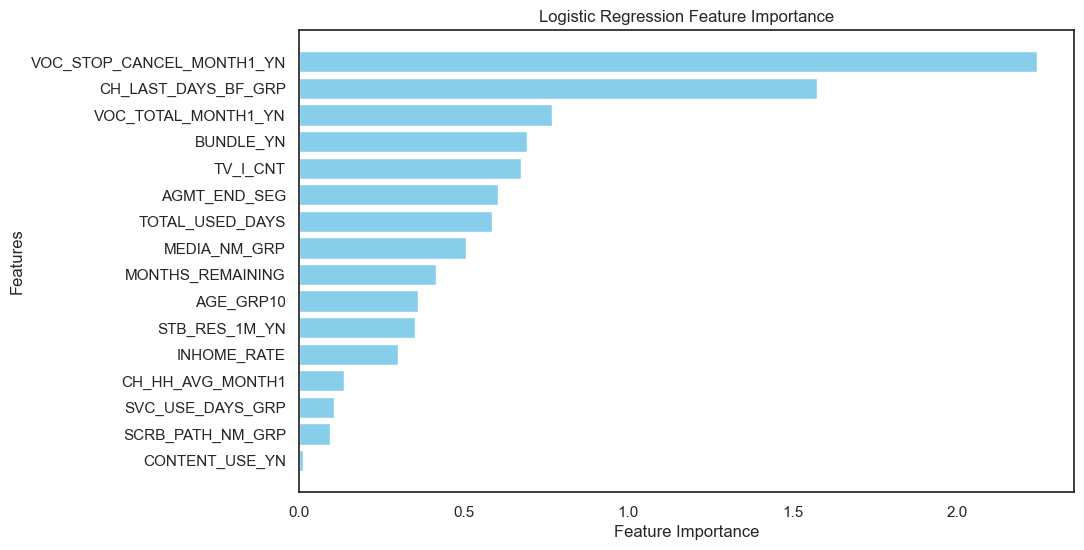

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Feature Importance 추출 (절댓값 사용)
feature_importance = np.abs(model.coef_[0])

# DataFrame 변환 및 정렬
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Feature Importance 시각화
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Logistic Regression Feature Importance")
plt.gca().invert_yaxis()
plt.show()

---

#### 2. 랜덤 포레스트 랜덤 언더 샘플링

In [31]:
X_train = train.drop(columns=['churn'])  # 독립 변수
y_train = train['churn']  # 종속 변수

# 랜덤 포레스트 모델
rf_model = RandomForestClassifier(
    n_estimators=100,  # 트리 개수
    random_state=42
)

# 모델 학습
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Test Accuracy: 0.80

Classification Report (테스트 데이터):
              precision    recall  f1-score   support

           0       1.00      0.80      0.89   1932416
           1       0.02      0.70      0.05     13176

    accuracy                           0.80   1945592
   macro avg       0.51      0.75      0.47   1945592
weighted avg       0.99      0.80      0.88   1945592


Confusion Matrix (테스트 데이터):
[[1545698  386718]
 [   3932    9244]]


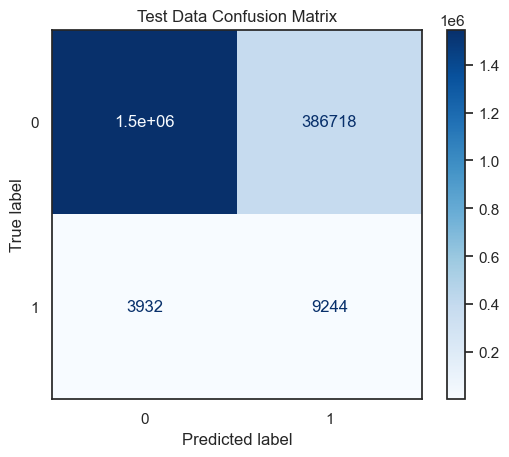

Test AUC-ROC: 0.82


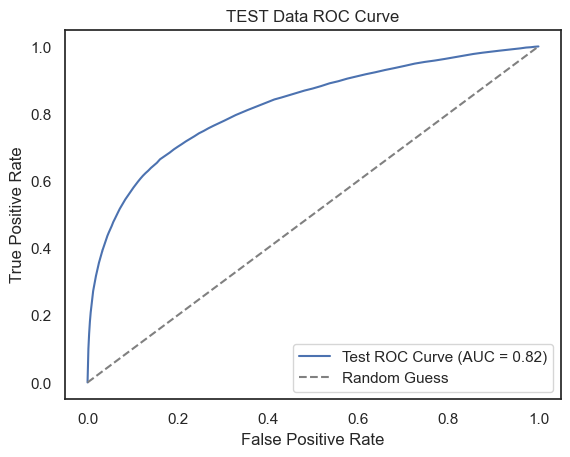

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay  # ConfusionMatrixDisplay 임포트
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

# 테스트 데이터 불러오기
X_test = test.drop(columns=['churn'])
y_test = test['churn']

# -----------------------------------------------------------
# 테스트 데이터 (Test) 평가
# -----------------------------------------------------------
# 테스트 데이터(test) 예측
test_predictions = rf_model.predict(X_test)

# 정확도 확인
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Classification 리포트
print("\nClassification Report (테스트 데이터):")
print(classification_report(y_test, test_predictions))

# Confusion Matrix (혼동행렬)
print("\nConfusion Matrix (테스트 데이터):")
print(confusion_matrix(y_test, test_predictions))
disp_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, test_predictions), display_labels=rf_model.classes_)

plt.figure()
disp_test.plot(cmap="Blues", ax=plt.gca())
plt.grid(False)
plt.title("Test Data Confusion Matrix")
plt.show()

# AUC-ROC 계산
test_probabilities = rf_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, test_probabilities)
print(f"Test AUC-ROC: {test_auc:.2f}")

# ROC Curve 시각화
fpr_val, tpr_val, thresholds_val = roc_curve(y_test, test_probabilities)
plt.figure()
plt.plot(fpr_val, tpr_val, label=f"Test ROC Curve (AUC = {test_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("TEST Data ROC Curve")
plt.legend()
plt.grid(False)
plt.show()

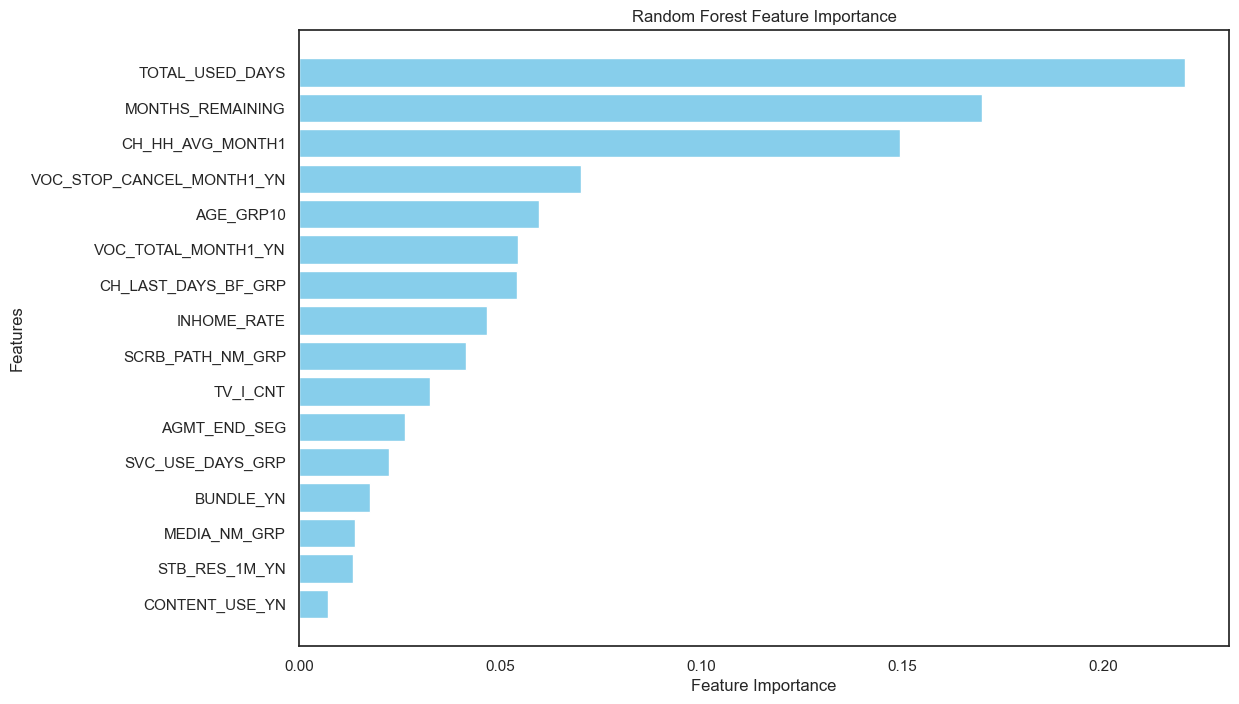

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

feature_importance = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Random Forest Feature Importance")
plt.gca().invert_yaxis()
plt.show()

---

#### 3. XGB 랜덤 언더 샘플링

In [36]:
from xgboost import XGBClassifier

X_train = train.drop(columns=['churn'])
y_train = train['churn']

# XGBoost 모델 생성
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42
)

# 모델 학습
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

Test Accuracy: 0.81

Classification Report (테스트 데이터):
              precision    recall  f1-score   support

           0       1.00      0.81      0.90   1932416
           1       0.03      0.73      0.05     13176

    accuracy                           0.81   1945592
   macro avg       0.51      0.77      0.47   1945592
weighted avg       0.99      0.81      0.89   1945592


Confusion Matrix (테스트 데이터):
[[1572110  360306]
 [   3497    9679]]


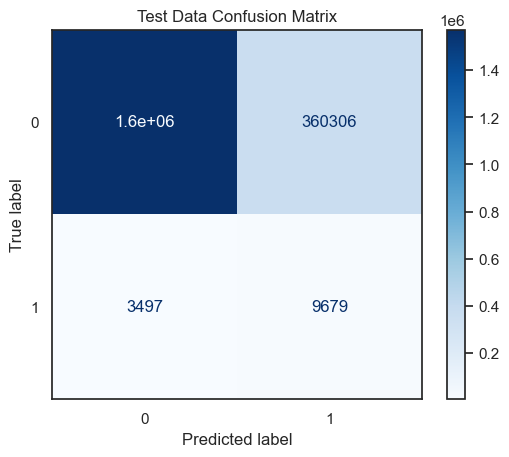

Test AUC-ROC: 0.85


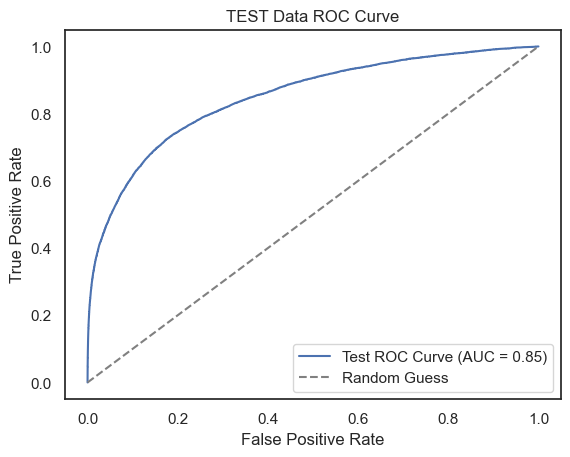

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay  # ConfusionMatrixDisplay 임포트
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

# 테스트 데이터 불러오기
X_test = test.drop(columns=['churn'])
y_test = test['churn']

# -----------------------------------------------------------
# 테스트 데이터 (Test) 평가
# -----------------------------------------------------------
# 테스트 데이터(test) 예측
test_predictions = xgb_model.predict(X_test)

# 정확도 확인
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Classification 리포트
print("\nClassification Report (테스트 데이터):")
print(classification_report(y_test, test_predictions))

# Confusion Matrix (혼동행렬)
print("\nConfusion Matrix (테스트 데이터):")
print(confusion_matrix(y_test, test_predictions))
disp_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, test_predictions), display_labels=xgb_model.classes_)

plt.figure()
disp_test.plot(cmap="Blues", ax=plt.gca())
plt.grid(False)
plt.title("Test Data Confusion Matrix")
plt.show()

# AUC-ROC 계산
test_probabilities = xgb_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, test_probabilities)
print(f"Test AUC-ROC: {test_auc:.2f}")

# ROC Curve 시각화
fpr_val, tpr_val, thresholds_val = roc_curve(y_test, test_probabilities)
plt.figure()
plt.plot(fpr_val, tpr_val, label=f"Test ROC Curve (AUC = {test_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("TEST Data ROC Curve")
plt.legend()
plt.grid(False)
plt.show()

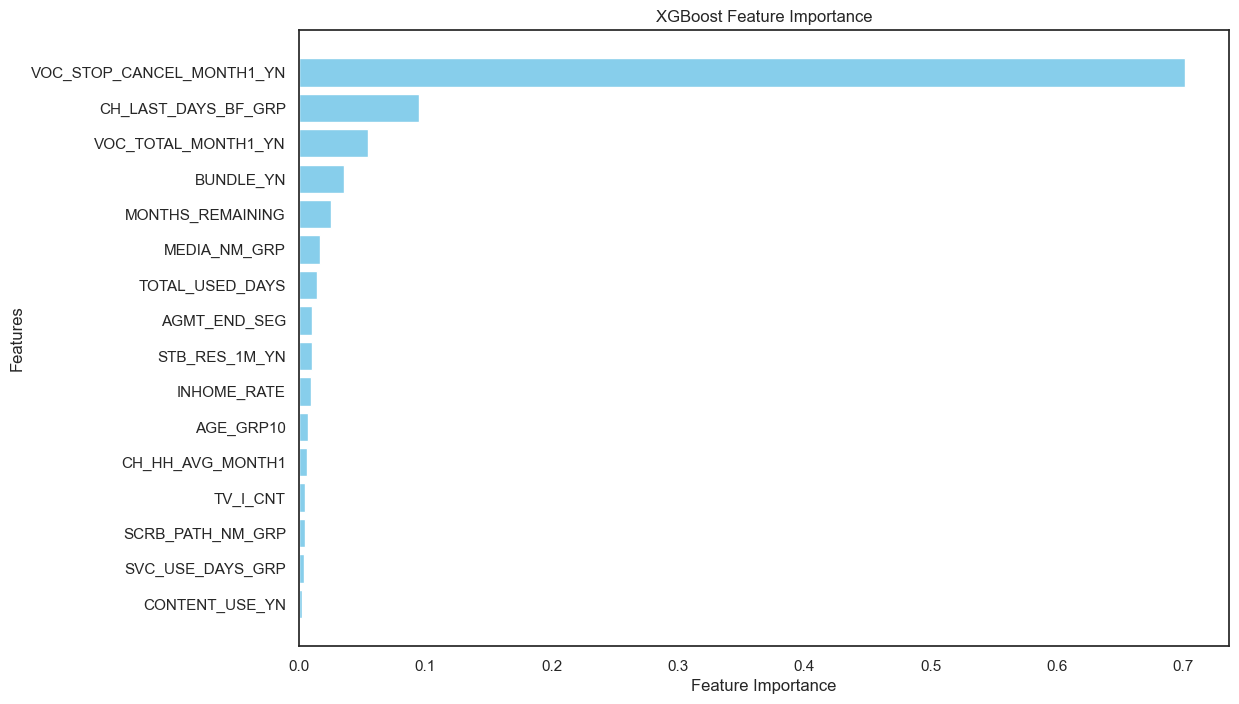

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# XGBoost Feature Importance 추출
feature_importance = xgb_model.feature_importances_

# DataFrame 변환 및 정렬
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Feature Importance 시각화
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("XGBoost Feature Importance")
plt.gca().invert_yaxis()
plt.show()

---

#### 4. LGBM 랜덤 언더 샘플링

In [40]:
from lightgbm import LGBMClassifier

# 독립 변수 & 종속 변수 설정
X_train = train.drop(columns=['churn'])  # 독립 변수
y_train = train['churn']  # 종속 변수

# LightGBM 모델 생성
lgbm_model = LGBMClassifier(
    n_estimators=100,
    max_depth=-1,
    learning_rate=0.1,
    random_state=42 
)

# 모델 학습
lgbm_model.fit(X_train, y_train)

LGBMClassifier(random_state=42)

Test Accuracy: 0.81

Classification Report (테스트 데이터):
              precision    recall  f1-score   support

           0       1.00      0.81      0.89   1932416
           1       0.03      0.74      0.05     13176

    accuracy                           0.81   1945592
   macro avg       0.51      0.77      0.47   1945592
weighted avg       0.99      0.81      0.89   1945592


Confusion Matrix (테스트 데이터):
[[1559682  372734]
 [   3426    9750]]


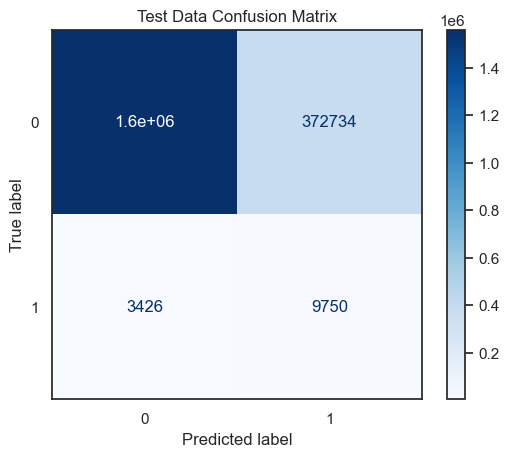

Test AUC-ROC: 0.85


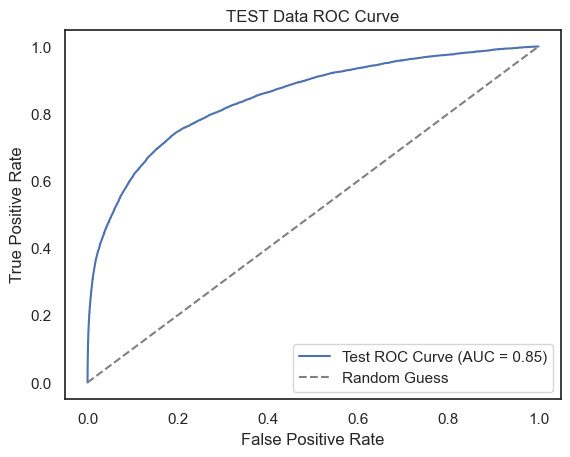

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay  # ConfusionMatrixDisplay 임포트
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

# 테스트 데이터 불러오기
X_test = test.drop(columns=['churn'])
y_test = test['churn']

# -----------------------------------------------------------
# 테스트 데이터 (Test) 평가
# -----------------------------------------------------------
# 테스트 데이터(test) 예측
test_predictions = lgbm_model.predict(X_test)

# 정확도 확인
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Classification 리포트
print("\nClassification Report (테스트 데이터):")
print(classification_report(y_test, test_predictions))

# Confusion Matrix (혼동행렬)
print("\nConfusion Matrix (테스트 데이터):")
print(confusion_matrix(y_test, test_predictions))
disp_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, test_predictions), display_labels=lgbm_model.classes_)

plt.figure()
disp_test.plot(cmap="Blues", ax=plt.gca())
plt.grid(False)
plt.title("Test Data Confusion Matrix")
plt.show()

# AUC-ROC 계산
test_probabilities = lgbm_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, test_probabilities)
print(f"Test AUC-ROC: {test_auc:.2f}")

# ROC Curve 시각화
fpr_val, tpr_val, thresholds_val = roc_curve(y_test, test_probabilities)
plt.figure()
plt.plot(fpr_val, tpr_val, label=f"Test ROC Curve (AUC = {test_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("TEST Data ROC Curve")
plt.legend()
plt.grid(False)
plt.show()

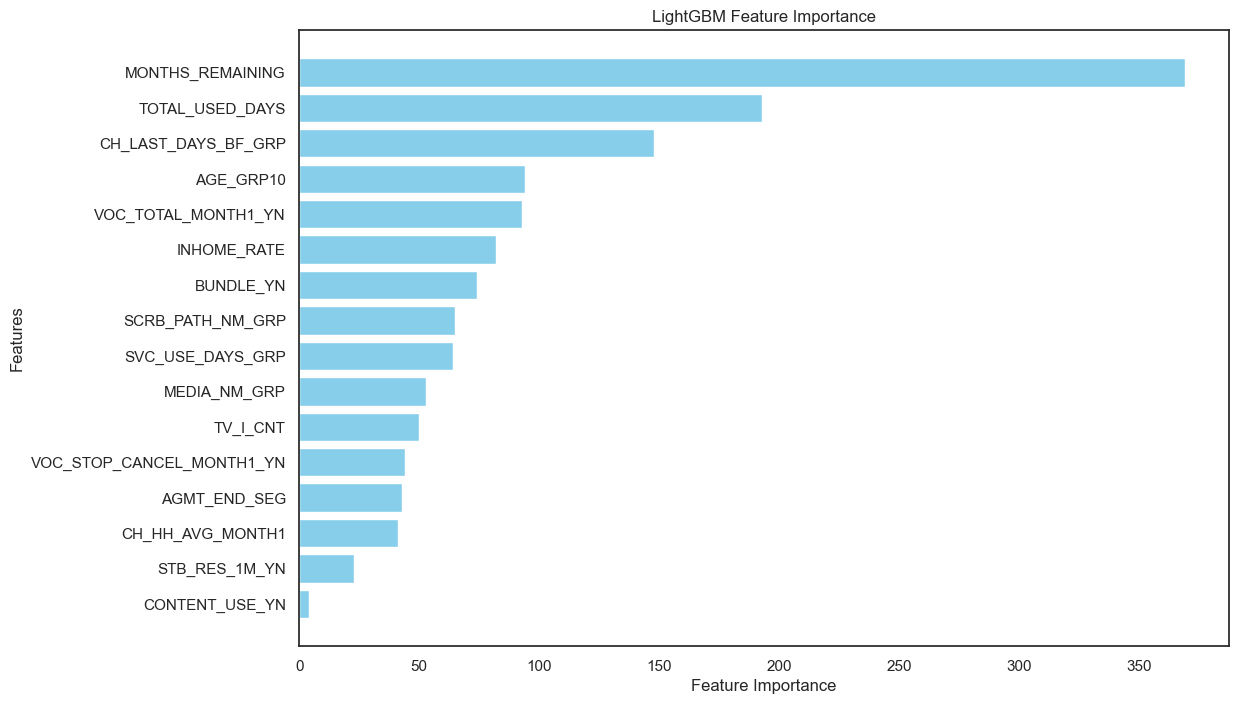

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# LightGBM Feature Importance 추출
feature_importance = lgbm_model.feature_importances_

# DataFrame 변환 및 정렬
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Feature Importance 시각화
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("LightGBM Feature Importance")
plt.gca().invert_yaxis()
plt.show()

---

#### 5. CatBoost 랜덤 언더 샘플링

In [47]:
from catboost import CatBoostClassifier

# 독립 변수 & 종속 변수 설정
X_train = train.drop(columns=['churn'])  # 독립 변수
y_train = train['churn']  # 종속 변수

# 기본값을 사용한 CatBoost 모델 생성
cat_model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.03,
    depth=6,
    random_seed=42
)

# 모델 학습
cat_model.fit(X_train, y_train)

0:	learn: 0.6794788	total: 229ms	remaining: 3m 48s
1:	learn: 0.6668095	total: 314ms	remaining: 2m 36s
2:	learn: 0.6552712	total: 369ms	remaining: 2m 2s
3:	learn: 0.6447161	total: 409ms	remaining: 1m 41s
4:	learn: 0.6349589	total: 448ms	remaining: 1m 29s
5:	learn: 0.6261056	total: 495ms	remaining: 1m 21s
6:	learn: 0.6178039	total: 535ms	remaining: 1m 15s
7:	learn: 0.6100878	total: 570ms	remaining: 1m 10s
8:	learn: 0.6029820	total: 602ms	remaining: 1m 6s
9:	learn: 0.5963766	total: 633ms	remaining: 1m 2s
10:	learn: 0.5903718	total: 670ms	remaining: 1m
11:	learn: 0.5847364	total: 706ms	remaining: 58.1s
12:	learn: 0.5795156	total: 798ms	remaining: 1m
13:	learn: 0.5748875	total: 847ms	remaining: 59.6s
14:	learn: 0.5703906	total: 925ms	remaining: 1m
15:	learn: 0.5664086	total: 973ms	remaining: 59.8s
16:	learn: 0.5625840	total: 1.02s	remaining: 59s
17:	learn: 0.5593923	total: 1.06s	remaining: 58s
18:	learn: 0.5562143	total: 1.1s	remaining: 56.6s
19:	learn: 0.5530379	total: 1.13s	remaining: 55.

Test Accuracy: 0.81

Classification Report (테스트 데이터):
              precision    recall  f1-score   support

           0       1.00      0.81      0.89   1932416
           1       0.03      0.74      0.05     13176

    accuracy                           0.81   1945592
   macro avg       0.51      0.77      0.47   1945592
weighted avg       0.99      0.81      0.89   1945592


Confusion Matrix (테스트 데이터):
[[1565707  366709]
 [   3438    9738]]


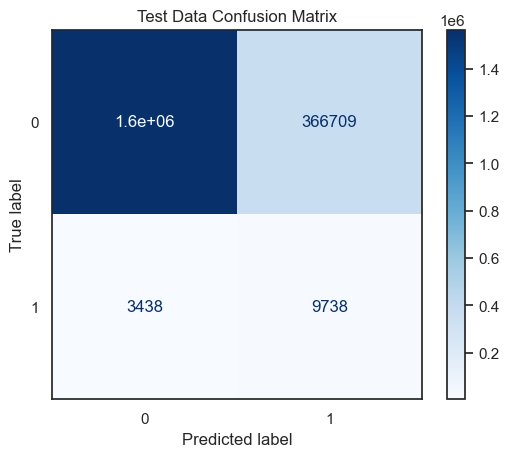

Test AUC-ROC: 0.85


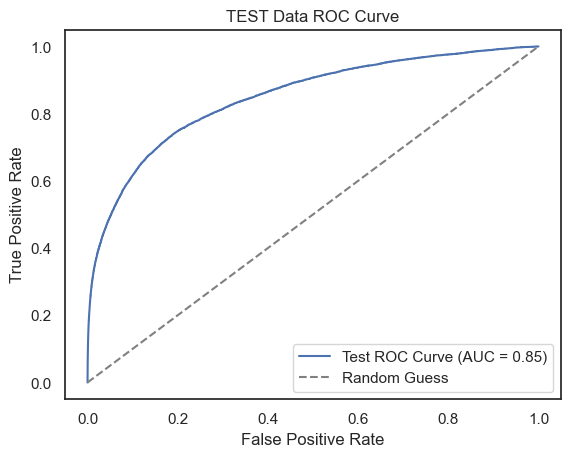

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay  # ConfusionMatrixDisplay 임포트
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

# 테스트 데이터 불러오기
X_test = test.drop(columns=['churn'])
y_test = test['churn']

# -----------------------------------------------------------
# 테스트 데이터 (Test) 평가
# -----------------------------------------------------------
# 테스트 데이터(test) 예측
test_predictions = cat_model.predict(X_test)

# 정확도 확인
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Classification 리포트
print("\nClassification Report (테스트 데이터):")
print(classification_report(y_test, test_predictions))

# Confusion Matrix (혼동행렬)
print("\nConfusion Matrix (테스트 데이터):")
print(confusion_matrix(y_test, test_predictions))
disp_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, test_predictions), display_labels=cat_model.classes_)

plt.figure()
disp_test.plot(cmap="Blues", ax=plt.gca())
plt.grid(False)
plt.title("Test Data Confusion Matrix")
plt.show()

# AUC-ROC 계산
test_probabilities = cat_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, test_probabilities)
print(f"Test AUC-ROC: {test_auc:.2f}")

# ROC Curve 시각화
fpr_val, tpr_val, thresholds_val = roc_curve(y_test, test_probabilities)
plt.figure()
plt.plot(fpr_val, tpr_val, label=f"Test ROC Curve (AUC = {test_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("TEST Data ROC Curve")
plt.legend()
plt.grid(False)
plt.show()

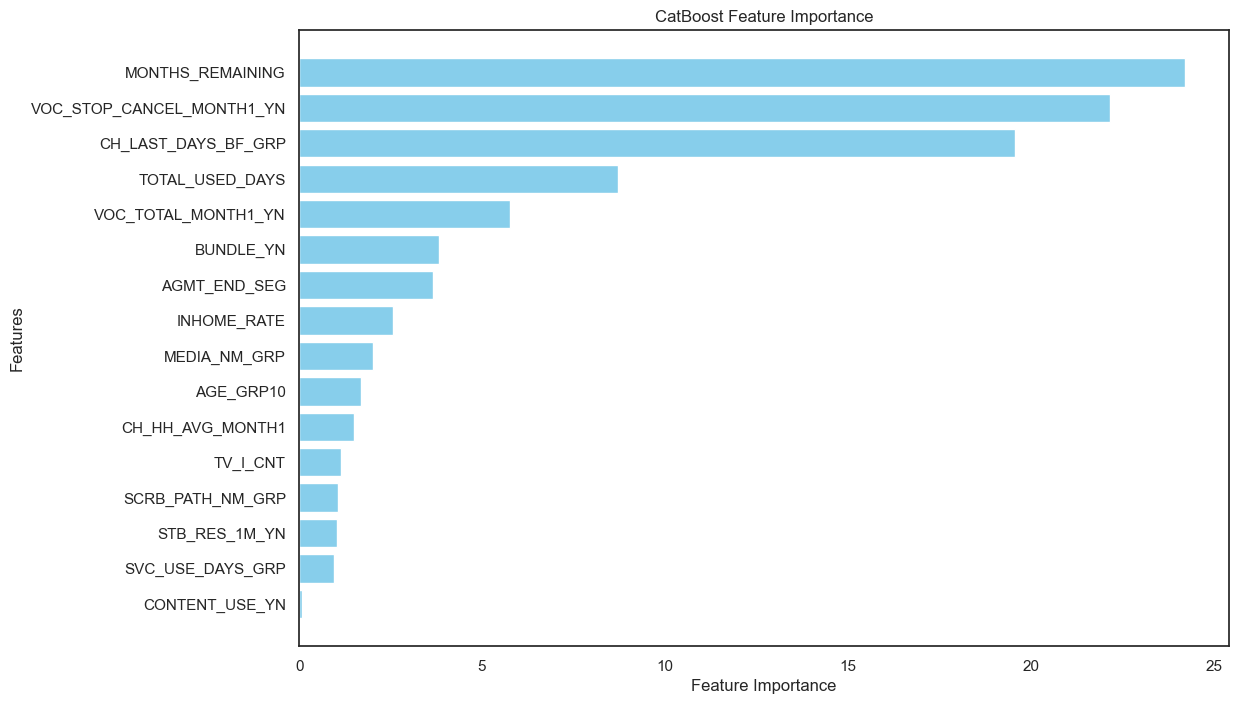

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# CatBoost Feature Importance 추출
feature_importance = cat_model.get_feature_importance()

# DataFrame 변환 및 정렬
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Feature Importance 시각화
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("CatBoost Feature Importance")
plt.gca().invert_yaxis()
plt.show()


---

### 가중치로 진행
1. 로지스틱
2. LGBM

#### 1. LR 가중치

In [54]:
# 해당 컬럼들 들고오기

df = df_real.filter(items=['sha2_hash', 'AGE_GRP10', 'AGMT_END_SEG', 'BUNDLE_YN', 'CH_HH_AVG_MONTH1',
                           'CH_LAST_DAYS_BF_GRP', 'CONTENT_USE_YN', 'INHOME_RATE', 'MEDIA_NM_GRP', 
                           'MONTHS_REMAINING', 'SCRB_PATH_NM_GRP', 'STB_RES_1M_YN', 'SVC_USE_DAYS_GRP', 
                           'TOTAL_USED_DAYS', 'TV_I_CNT', 'VOC_STOP_CANCEL_MONTH1_YN', 'VOC_TOTAL_MONTH1_YN', 
                           'p_mt', 'churn'])

In [56]:
display(df)

,sha2_hash,AGE_GRP10,AGMT_END_SEG,BUNDLE_YN,CH_HH_AVG_MONTH1,CH_LAST_DAYS_BF_GRP,CONTENT_USE_YN,INHOME_RATE,MEDIA_NM_GRP,MONTHS_REMAINING,SCRB_PATH_NM_GRP,STB_RES_1M_YN,SVC_USE_DAYS_GRP,TOTAL_USED_DAYS,TV_I_CNT,VOC_STOP_CANCEL_MONTH1_YN,VOC_TOTAL_MONTH1_YN,p_mt,churn
0,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,60대,약정만료전 12개월이상,Y,0.00,3개월내없음,N,10.00,HD,13,I/B,N,12개월~24개월미만,733,3.00,N,N,2,N
1,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,60대,약정만료전 9~12개월,Y,6.72,일주일내,N,0.00,HD,12,I/B,Y,24개월~ 36개월미만,764,3.00,N,Y,3,N
2,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,60대,약정만료전 9~12개월,Y,9.86,3주일전,N,10.00,HD,11,I/B,N,24개월~ 36개월미만,794,3.00,N,N,4,N
3,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,60대,약정만료전 9~12개월,Y,5.95,4주일전,N,10.00,HD,10,I/B,N,24개월~ 36개월미만,825,3.00,N,N,5,N
4,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,60대,약정만료전 6~9개월,Y,4.03,일주일내,N,0.00,HD,9,I/B,N,24개월~ 36개월미만,855,3.00,N,N,6,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21483374,fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7,50대,약정만료후 12개월이상,N,2.03,일주일내,N,10.00,HD,-40,현장경로,N,36개월 이상,2338,1.00,N,N,8,N
21483375,fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7,50대,약정만료후 12개월이상,N,2.91,일주일내,N,10.00,HD,-41,현장경로,N,36개월 이상,2368,1.00,N,N,9,N
21483376,fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7,50대,약정만료후 12개월이상,N,1.97,2주일전,N,10.00,HD,-42,현장경로,N,36개월 이상,2399,1.00,N,Y,10,N
21483377,fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7,50대,약정만료후 12개월이상,N,0.00,3개월내없음,N,0.00,HD,-43,현장경로,N,36개월 이상,2429,1.00,N,N,11,N


In [57]:
train = df[df['p_mt'].isin([2,3,4,5,6,7,8,9])]
test = df[df['p_mt'] == 11]

In [58]:
train['INHOME_RATE'] = train['INHOME_RATE'].astype(str)
test['INHOME_RATE'] = test['INHOME_RATE'].astype(str)
print(train['INHOME_RATE'].dtypes)
print(test['INHOME_RATE'].dtypes)

object
object


In [59]:
train = train.drop(columns=['sha2_hash','p_mt'])
test = test.drop(columns=['sha2_hash','p_mt'])

In [61]:
from sklearn.preprocessing import LabelEncoder

train_and_test = pd.concat([train, test])

categorical_cols = train_and_test.select_dtypes(include=['object']).columns

label_encoders = {}

for col in categorical_cols:
  le = LabelEncoder()
  train_and_test[col] = le.fit_transform(train_and_test[col])
  label_encoders[col] = le

# 인코딩 후, 다시 train과 test로 분리

train = train_and_test.iloc[:len(train)].reset_index(drop=True)
test = train_and_test.iloc[len(train):].reset_index(drop=True)

print("레이블 인코딩 끝! 😁")

레이블 인코딩 끝! 😁


In [62]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

# boxplot으로 확인한 robust 스케일링 컬럼들
robust_columns = ['TOTAL_USED_DAYS', 'CH_HH_AVG_MONTH1', 'MONTHS_REMAINING']  # RobustScaler를 적용할 컬럼
minmax_columns = [col for col in train.columns if col not in robust_columns + ['churn']]  # 나머지 컬럼

# 스케일러 생성
robust_scaler = RobustScaler()
minmax_scaler = MinMaxScaler()

# RobustScaler 적용
train[robust_columns] = robust_scaler.fit_transform(train[robust_columns])
test[robust_columns] = robust_scaler.transform(test[robust_columns])

# MinMaxScaler 적용
train[minmax_columns] = minmax_scaler.fit_transform(train[minmax_columns])
test[minmax_columns] = minmax_scaler.transform(test[minmax_columns])

# 결과 확인
print("robust, minmax 끝")

robust, minmax 끝


In [65]:
display(train, test)

,AGE_GRP10,AGMT_END_SEG,BUNDLE_YN,CH_HH_AVG_MONTH1,CH_LAST_DAYS_BF_GRP,CONTENT_USE_YN,INHOME_RATE,MEDIA_NM_GRP,MONTHS_REMAINING,SCRB_PATH_NM_GRP,STB_RES_1M_YN,SVC_USE_DAYS_GRP,TOTAL_USED_DAYS,TV_I_CNT,VOC_STOP_CANCEL_MONTH1_YN,VOC_TOTAL_MONTH1_YN,churn
0,0.56,0.08,1.00,-0.65,0.20,0.00,0.10,0.00,0.08,0.00,0.00,0.00,-1.41,0.40,0.00,0.00,0
1,0.56,0.54,1.00,0.50,0.80,0.00,0.00,0.00,0.07,0.00,1.00,0.25,-1.39,0.40,0.00,1.00,0
2,0.56,0.54,1.00,1.03,0.40,0.00,0.10,0.00,0.05,0.00,0.00,0.25,-1.37,0.40,0.00,0.00,0
3,0.56,0.54,1.00,0.37,0.60,0.00,0.10,0.00,0.03,0.00,0.00,0.25,-1.35,0.40,0.00,0.00,0
4,0.56,0.46,1.00,0.04,0.80,0.00,0.00,0.00,0.02,0.00,0.00,0.25,-1.33,0.40,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15647031,0.44,0.62,0.00,-0.02,0.80,0.00,0.10,0.00,-0.75,1.00,0.00,0.50,-0.42,0.00,0.00,0.00,0
15647032,0.44,0.62,0.00,-0.11,0.80,0.00,0.10,0.00,-0.77,1.00,0.00,0.50,-0.40,0.00,0.00,0.00,0
15647033,0.44,0.62,0.00,0.05,0.80,0.00,0.10,0.00,-0.78,1.00,0.00,0.50,-0.38,0.00,0.00,0.00,0
15647034,0.44,0.62,0.00,-0.30,0.80,0.00,0.10,0.00,-0.80,1.00,0.00,0.50,-0.36,0.00,0.00,0.00,0


,AGE_GRP10,AGMT_END_SEG,BUNDLE_YN,CH_HH_AVG_MONTH1,CH_LAST_DAYS_BF_GRP,CONTENT_USE_YN,INHOME_RATE,MEDIA_NM_GRP,MONTHS_REMAINING,SCRB_PATH_NM_GRP,STB_RES_1M_YN,SVC_USE_DAYS_GRP,TOTAL_USED_DAYS,TV_I_CNT,VOC_STOP_CANCEL_MONTH1_YN,VOC_TOTAL_MONTH1_YN,churn
0,0.56,0.08,1.00,0.41,0.80,0.00,0.30,0.00,0.42,0.00,0.00,0.25,-1.23,0.40,0.00,0.00,0
1,0.44,0.46,1.00,1.97,0.80,0.00,0.80,0.00,-0.02,0.00,0.00,0.25,1.00,0.20,0.00,0.00,0
2,0.56,0.08,1.00,-0.40,0.80,0.00,0.10,0.00,0.20,0.44,0.00,0.50,-0.16,1.00,0.00,0.00,0
3,0.56,1.00,0.00,-0.28,0.80,0.00,0.10,0.00,-0.30,0.44,0.00,0.50,-0.58,0.40,0.00,0.00,0
4,0.44,0.62,1.00,-0.37,0.80,0.00,0.00,0.00,-0.98,1.00,0.00,0.50,0.72,0.60,0.00,1.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945587,0.44,0.62,0.00,-0.65,0.20,0.00,0.00,0.00,-0.93,1.00,0.00,0.50,0.47,0.20,0.00,0.00,0
1945588,0.33,0.62,1.00,-0.34,0.80,0.00,0.10,0.00,-0.78,0.11,0.00,0.50,-0.39,0.40,0.00,0.00,0
1945589,0.22,0.62,0.00,-0.36,0.80,0.00,0.00,0.00,-1.95,0.44,0.00,0.00,0.70,0.20,0.00,0.00,0
1945590,0.44,0.08,1.00,-0.07,0.80,0.00,0.30,0.50,0.18,0.00,0.00,0.50,-0.87,0.20,0.00,0.00,0


In [66]:
# 로지스틱 회귀 모델 진행

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train = train.drop(columns=['churn'])
y_train = train['churn']

# 로지스틱 회귀 모델 생성
model = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42)

# 모델 학습
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=42, solver='liblinear')

Test Accuracy: 0.78

Classification Report (테스트 데이터):
              precision    recall  f1-score   support

           0       1.00      0.78      0.88   1932416
           1       0.02      0.69      0.04     13176

    accuracy                           0.78   1945592
   macro avg       0.51      0.74      0.46   1945592
weighted avg       0.99      0.78      0.87   1945592


Confusion Matrix (테스트 데이터):
[[1510413  422003]
 [   4093    9083]]


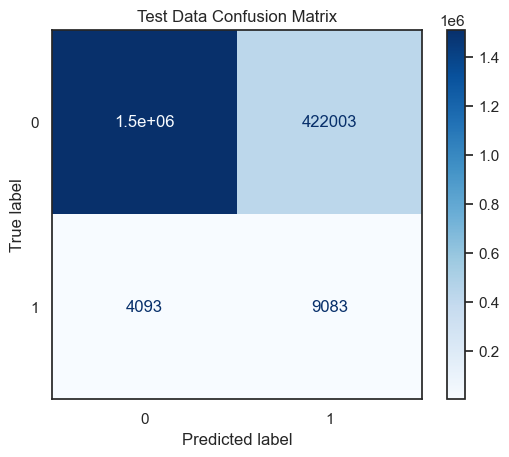

Test AUC-ROC: 0.81


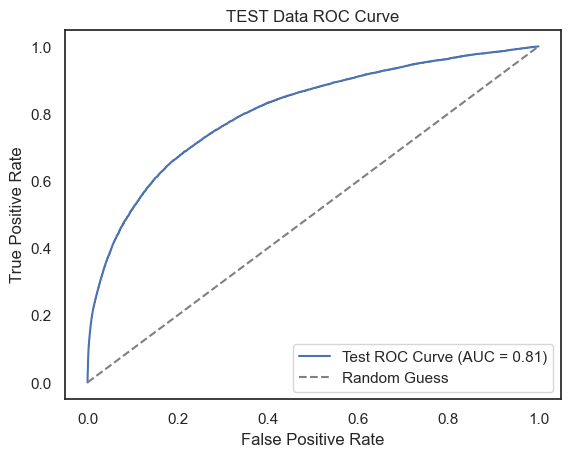

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay  # ConfusionMatrixDisplay 임포트
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

# 테스트 데이터 불러오기
X_test = test.drop(columns=['churn'])
y_test = test['churn']

# -----------------------------------------------------------
# 테스트 데이터 (Test) 평가
# -----------------------------------------------------------
# 테스트 데이터(test) 예측
test_predictions = model.predict(X_test)

# 정확도 확인
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Classification 리포트
print("\nClassification Report (테스트 데이터):")
print(classification_report(y_test, test_predictions))

# Confusion Matrix (혼동행렬)
print("\nConfusion Matrix (테스트 데이터):")
print(confusion_matrix(y_test, test_predictions))
disp_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, test_predictions), display_labels=model.classes_)

plt.figure()
disp_test.plot(cmap="Blues", ax=plt.gca())
plt.grid(False)
plt.title("Test Data Confusion Matrix")
plt.show()

# AUC-ROC 계산
test_probabilities = model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, test_probabilities)
print(f"Test AUC-ROC: {test_auc:.2f}")

# ROC Curve 시각화
fpr_val, tpr_val, thresholds_val = roc_curve(y_test, test_probabilities)
plt.figure()
plt.plot(fpr_val, tpr_val, label=f"Test ROC Curve (AUC = {test_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("TEST Data ROC Curve")
plt.legend()
plt.grid(False)
plt.show()

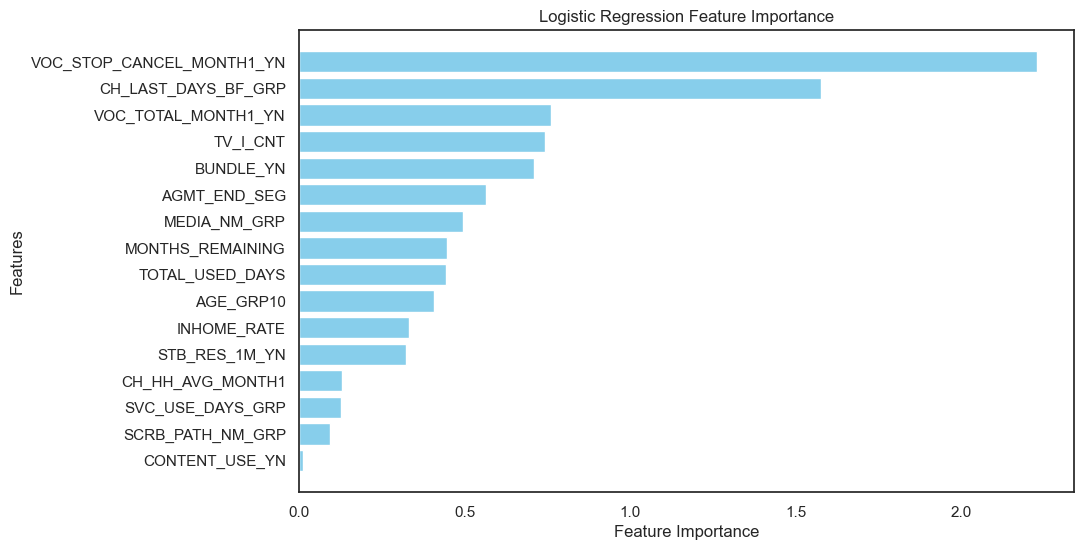

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

feature_importance = np.abs(model.coef_[0])

feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Logistic Regression Feature Importance")
plt.gca().invert_yaxis()
plt.show()

---

#### 2. LGBM 가중치

In [73]:
from lightgbm import LGBMClassifier

# 독립 변수 & 종속 변수 설정
X_train = train.drop(columns=['churn'])  # 독립 변수
y_train = train['churn']  # 종속 변수

# LightGBM 모델 생성
lgbm_model = LGBMClassifier(
    n_estimators=100,
    max_depth=-1,
    learning_rate=0.1,
    class_weight='balanced',  # 클래스 가중치 적용
    random_state=42 
)

# 모델 학습
lgbm_model.fit(X_train, y_train)

LGBMClassifier(class_weight='balanced', random_state=42)

Test Accuracy: 0.81

Classification Report (테스트 데이터):
              precision    recall  f1-score   support

           0       1.00      0.81      0.89   1932416
           1       0.03      0.74      0.05     13176

    accuracy                           0.81   1945592
   macro avg       0.51      0.77      0.47   1945592
weighted avg       0.99      0.81      0.89   1945592


Confusion Matrix (테스트 데이터):
[[1565139  367277]
 [   3454    9722]]


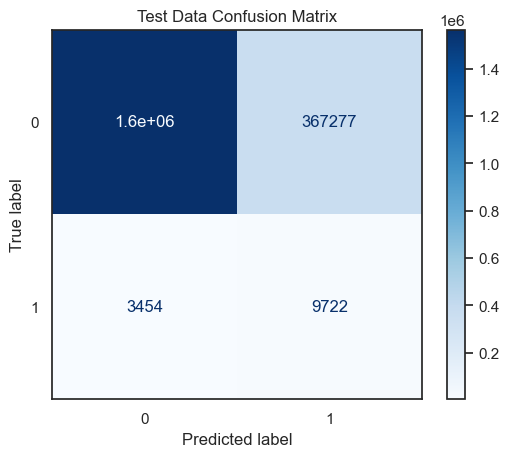

Test AUC-ROC: 0.85


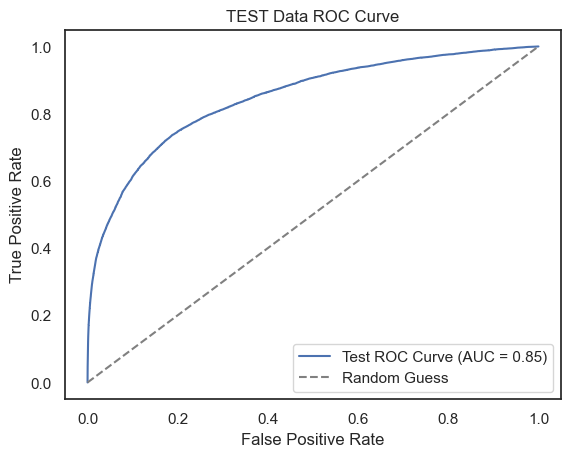

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay  # ConfusionMatrixDisplay 임포트
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

# 테스트 데이터 불러오기
X_test = test.drop(columns=['churn'])
y_test = test['churn']

# -----------------------------------------------------------
# 테스트 데이터 (Test) 평가
# -----------------------------------------------------------
# 테스트 데이터(test) 예측
test_predictions = lgbm_model.predict(X_test)

# 정확도 확인
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Classification 리포트
print("\nClassification Report (테스트 데이터):")
print(classification_report(y_test, test_predictions))

# Confusion Matrix (혼동행렬)
print("\nConfusion Matrix (테스트 데이터):")
print(confusion_matrix(y_test, test_predictions))
disp_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, test_predictions), display_labels=lgbm_model.classes_)

plt.figure()
disp_test.plot(cmap="Blues", ax=plt.gca())
plt.grid(False)
plt.title("Test Data Confusion Matrix")
plt.show()

# AUC-ROC 계산
test_probabilities = lgbm_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, test_probabilities)
print(f"Test AUC-ROC: {test_auc:.2f}")

# ROC Curve 시각화
fpr_val, tpr_val, thresholds_val = roc_curve(y_test, test_probabilities)
plt.figure()
plt.plot(fpr_val, tpr_val, label=f"Test ROC Curve (AUC = {test_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("TEST Data ROC Curve")
plt.legend()
plt.grid(False)
plt.show()

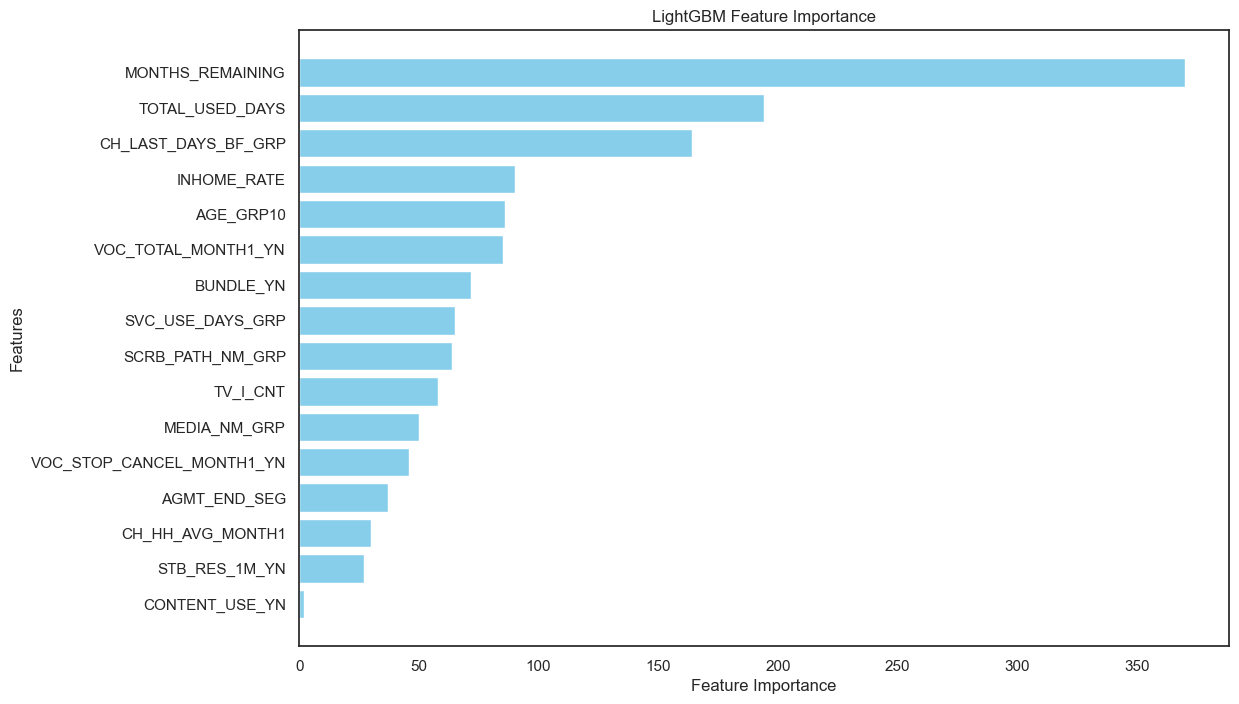

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# LightGBM Feature Importance 추출
feature_importance = lgbm_model.feature_importances_

# DataFrame 변환 및 정렬
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Feature Importance 시각화
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("LightGBM Feature Importance")
plt.gca().invert_yaxis()
plt.show()

---

모델링 결과, <BR><BR>

**로지스틱 회귀 랜덤언더 FE** > 로지스틱 회귀 랜덤언더 FE 2   
**랜덤포레스트 랜덤언더 FE** > 랜덤포레스트 랜덤언더 FE 2   
XGB 랜덤언더 FE < **XGB 랜덤언더 FE 2**   
LGBM 랜덤언더 FE < **LGBM 랜덤언더 FE 2**    
CAT 랜덤언더 FE < **CAT 랜덤언더 FE 2**   
**로지스틱 회귀 가중치 FE** > 로지스틱 회귀 가중치 FE 2   
LGBM 가중치 FE < **LGBM 가중치 FE 2**   

해당 Feature들로 모델링을 했을 시, XGB, LGBM 랜덤 언더 샘플링 결과에서 좀 더 나은 성능을 보여준다.<br><br>
그리고 **LightGBM**, **XGBoost**에서 제일 좋은 성능들을 보여준다.<br><br>

이제, 여러 모델들을 돌려봤을때, 상위 7개의 컬럼들만 남기고 돌려보겠다.